# Facebook Data Crawling

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as DateFormatter

In [3]:
data = pd.read_csv('Data/Data_cleaned.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        300 non-null    int64  
 1   text                           278 non-null    object 
 2   post_text                      278 non-null    object 
 3   time                           300 non-null    object 
 4   timestamp                      300 non-null    int64  
 5   image                          137 non-null    object 
 6   image_lowquality               300 non-null    object 
 7   images                         292 non-null    object 
 8   images_description             292 non-null    object 
 9   images_lowquality              300 non-null    object 
 10  images_lowquality_description  300 non-null    object 
 11  video                          154 non-null    object 
 12  video_id                       154 non-null    flo

# Bài viết có lượt tương tác nhiều nhất

In [5]:
# Lọc những posts không có tương tác
data['reactions'].dropna()

0      {'like': 1387, 'love': 429, 'haha': 8, 'wow': ...
1      {'like': 787, 'love': 842, 'haha': 13, 'wow': ...
2      {'like': 458, 'love': 56, 'haha': 113, 'wow': ...
3      {'like': 2113, 'love': 647, 'haha': 21, 'wow':...
4      {'like': 4013, 'love': 2965, 'haha': 117, 'wow...
                             ...                        
295     {'like': 619, 'love': 298, 'haha': 6, 'care': 8}
296    {'like': 984, 'love': 261, 'haha': 579, 'wow':...
297    {'like': 4455, 'love': 3154, 'haha': 19, 'wow'...
298    {'like': 5564, 'love': 3681, 'haha': 15, 'wow'...
299    {'like': 1903, 'love': 962, 'haha': 32, 'wow':...
Name: reactions, Length: 300, dtype: object

In [6]:
data.loc[data['reaction_count'].idxmax()]

post_id                                                          10166328789730556
text                                                                           NaN
post_text                                                                      NaN
time                                                           2022-10-05 00:49:56
timestamp                                                               1664905796
image                            https://scontent.fhan3-4.fna.fbcdn.net/v/t39.3...
image_lowquality                 https://scontent.fhan3-1.fna.fbcdn.net/v/t39.3...
images                           ['https://scontent.fhan3-4.fna.fbcdn.net/v/t39...
images_description                             ['No photo description available.']
images_lowquality                ['https://scontent.fhan3-1.fna.fbcdn.net/v/t39...
images_lowquality_description    ["May be a graphic of 1 person and text that s...
video                                                                          NaN
vide

In [7]:
data['reaction_count'].max()

77022

# Các mốc thời gian thường xuyên đăng bài và lượng tương tác

In [8]:
data['time']

0      2023-11-11 00:01:26
1      2023-11-10 04:01:42
2      2023-11-10 00:01:31
3      2023-11-08 02:00:11
4      2023-11-08 00:00:27
              ...         
295    2022-08-02 23:00:02
296    2022-07-31 00:00:00
297    2022-07-29 23:00:16
298    2022-07-29 22:00:01
299    2022-07-29 01:00:00
Name: time, Length: 300, dtype: object

In [9]:
# Tổng số bài viết theo giờ
total_posts_by_hour = data['hour'].value_counts()

total_posts_by_hour = total_posts_by_hour.reindex(range(24), fill_value=0)

total_posts_by_hour

hour
0     39
1     41
2     27
3     24
4     23
5      9
6      6
7      3
8      4
9      0
10     0
11     0
12     1
13     1
14     1
15     0
16     0
17     0
18     0
19     0
20     1
21     7
22    45
23    68
Name: count, dtype: int64

In [10]:
# Tổng số reactions theo giờ
total_reactions_by_hour = data.groupby('hour')['reaction_count'].sum()

total_reactions_by_hour = total_reactions_by_hour.reindex(range(24), fill_value=0)

total_reactions_by_hour

hour
0     323794
1     136674
2     141059
3      85585
4      81612
5      67466
6      24220
7      53704
8      38020
9          0
10         0
11         0
12      2054
13      5445
14      3980
15         0
16         0
17         0
18         0
19         0
20     47100
21     48232
22    312902
23    345163
Name: reaction_count, dtype: int64

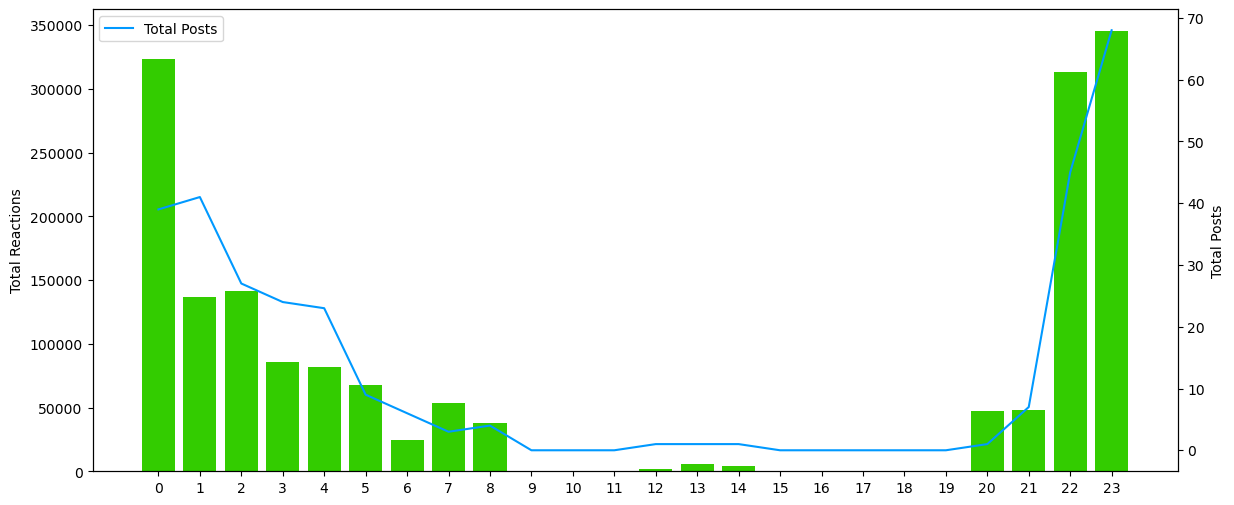

In [11]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.bar(total_reactions_by_hour.index, total_reactions_by_hour.values, color='#33CC00', label='Total Reactions')
ax1.set_xticks(total_reactions_by_hour.index)
ax1.set_ylabel('Total Reactions')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.plot(total_posts_by_hour.index, total_posts_by_hour.values, color='#0099FF', label='Total Posts')
ax2.set_ylabel('Total Posts')
ax2.tick_params(axis='y')

plt.xlabel('Hours')
plt.legend()
plt.show()

# Từ khóa xuất hiện nhiều nhất

In [12]:
df_text = data[['post_id','post_text']]
df_text = df_text.dropna()
text = str(df_text['post_text'])

df_text

,post_id,post_text
1,858026609027130,Let’s mix it up. Put your own spin on new HEAR...
2,857949939034797,Try not to slow down the beat. Breakout True D...
3,857028042460320,❤️‍🔥New HEARTSTEEL skins\n💥Breakout True Damag...
5,851594899670301,a simple emote can mean many things
6,851558773007247,there’s no better feeling in the world
...,...,...
295,10166863086175556,Looks like it's up to the Star Guardians to sa...
296,10166859995650556,Who needs vision when you have damage? ¯\_(ツ)_...
297,10166863021360556,Star Guardian chromas spotted taking on a new ...
298,10166859979105556,"To escape the clutches of darkness, reach for ..."


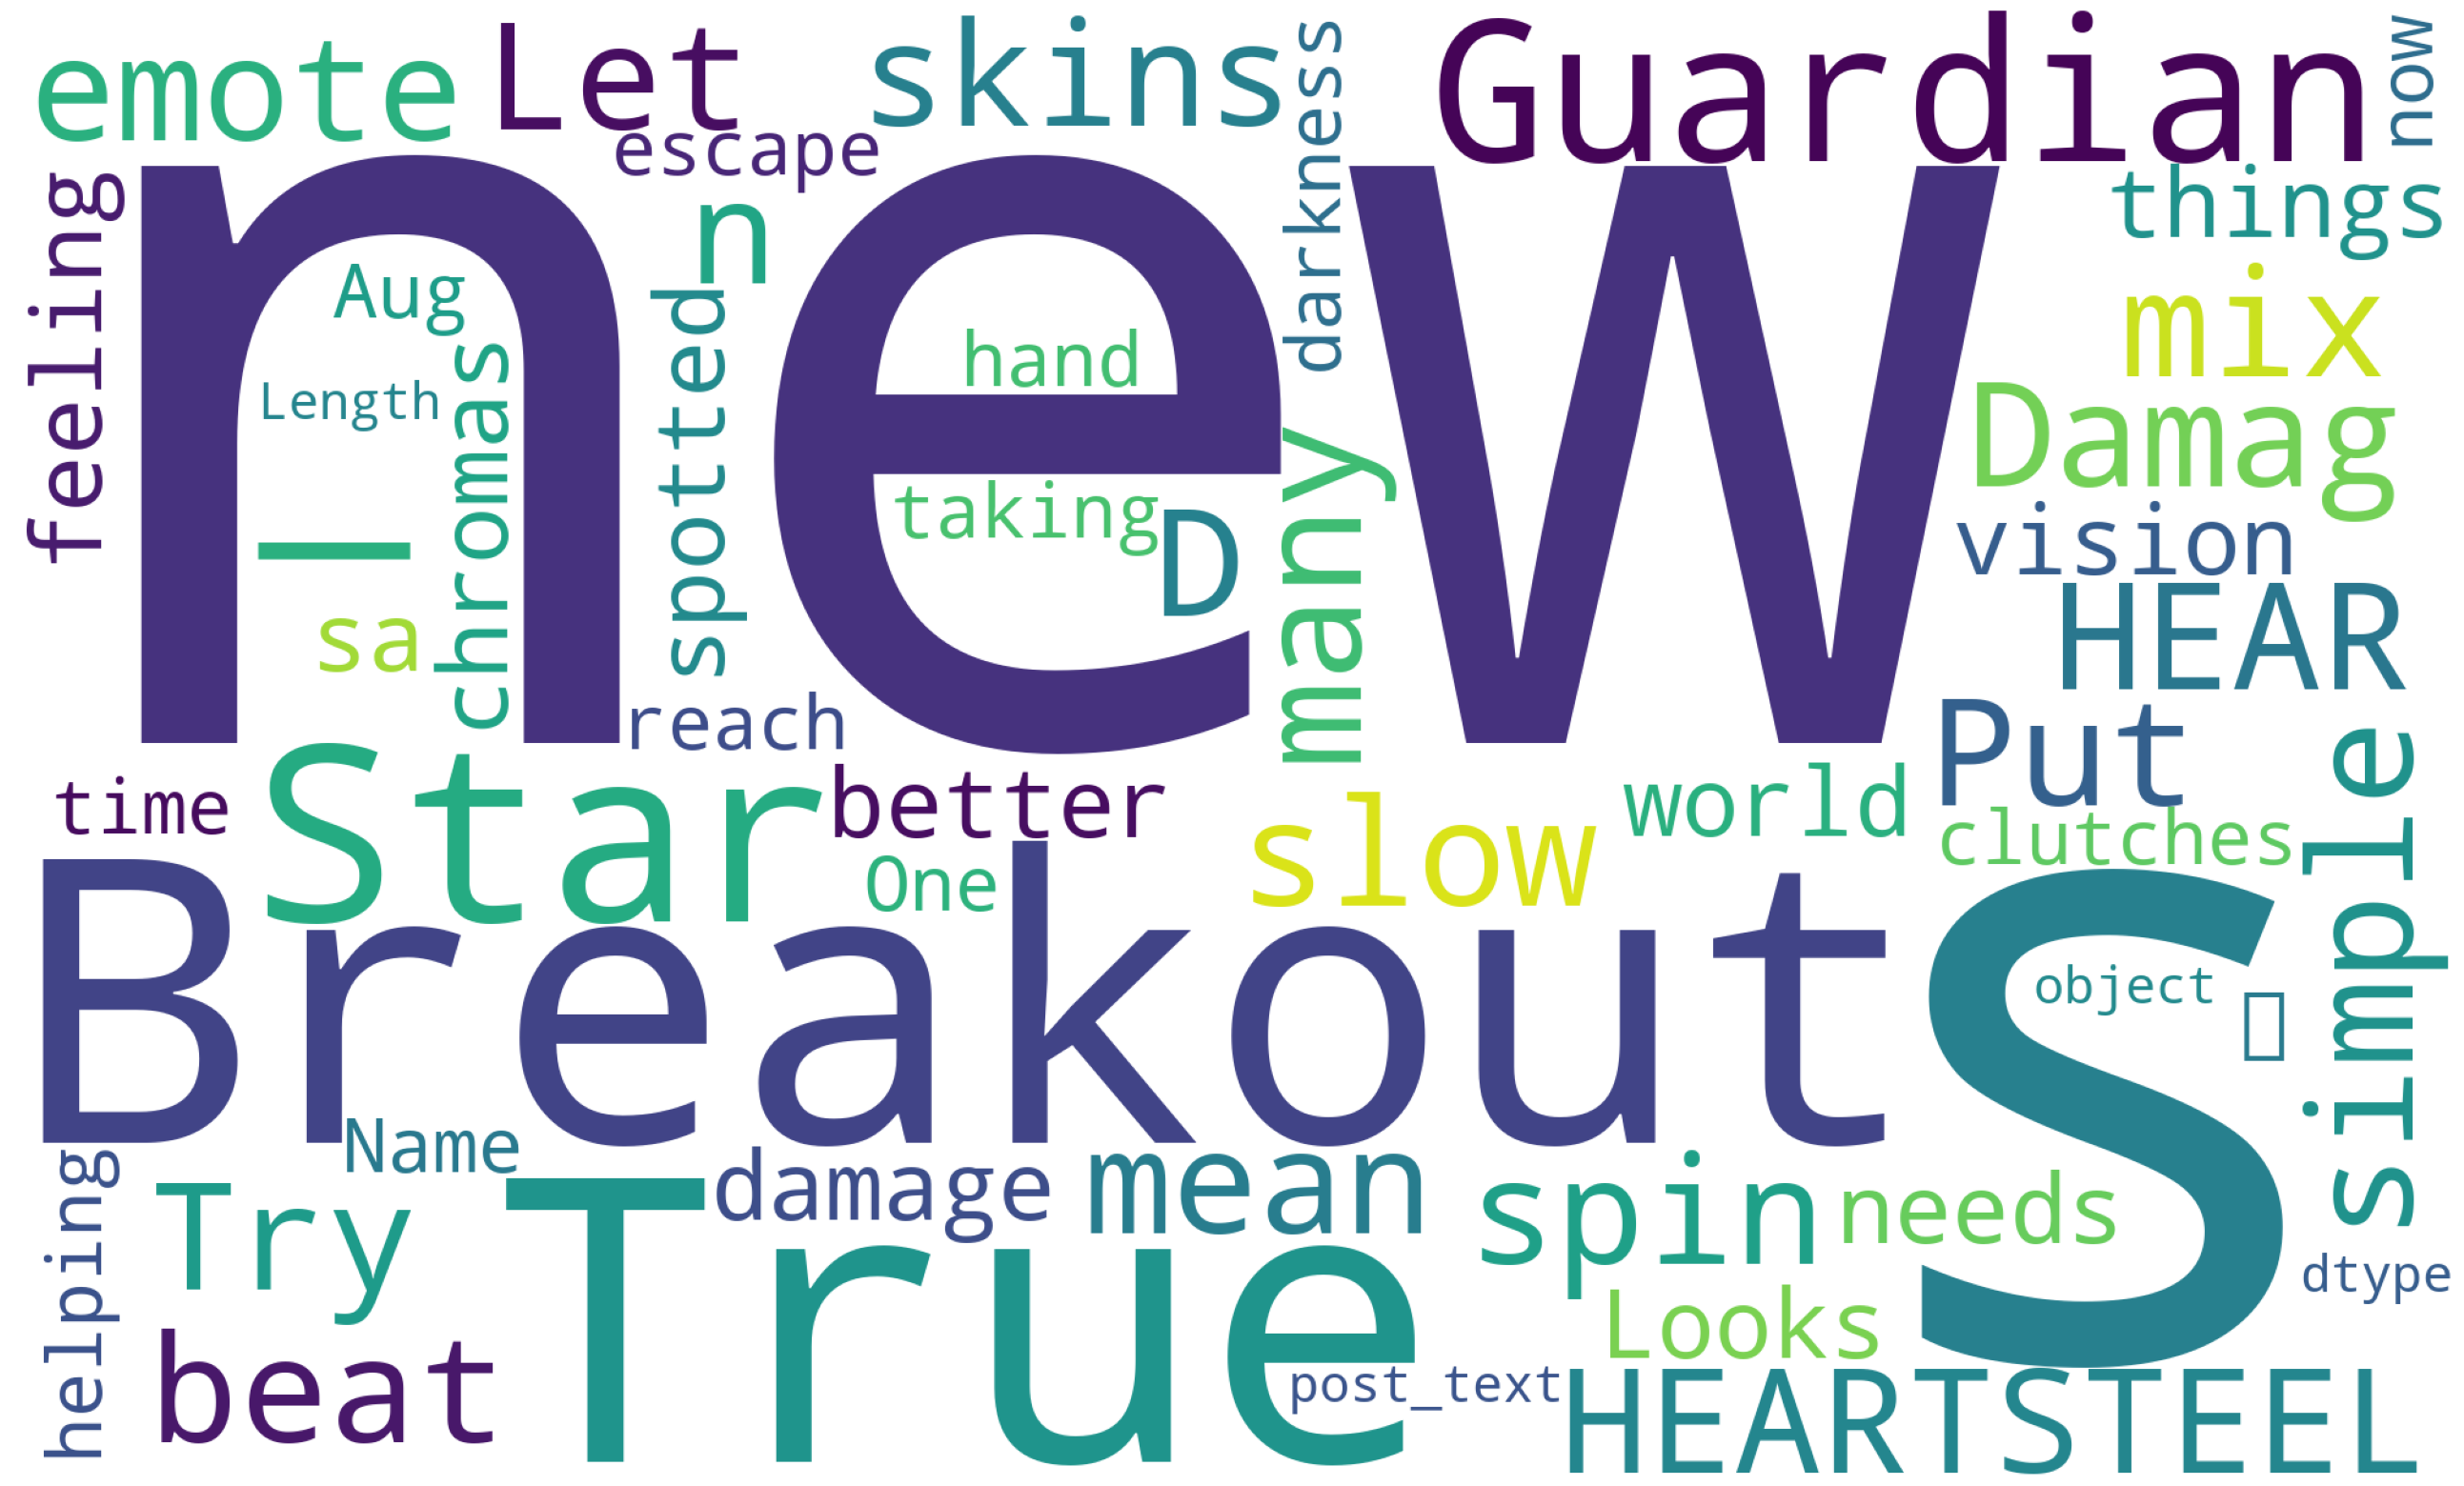

In [13]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Đánh giá số lượt tương tác của các bài

In [14]:
data['time']

0      2023-11-11 00:01:26
1      2023-11-10 04:01:42
2      2023-11-10 00:01:31
3      2023-11-08 02:00:11
4      2023-11-08 00:00:27
              ...         
295    2022-08-02 23:00:02
296    2022-07-31 00:00:00
297    2022-07-29 23:00:16
298    2022-07-29 22:00:01
299    2022-07-29 01:00:00
Name: time, Length: 300, dtype: object

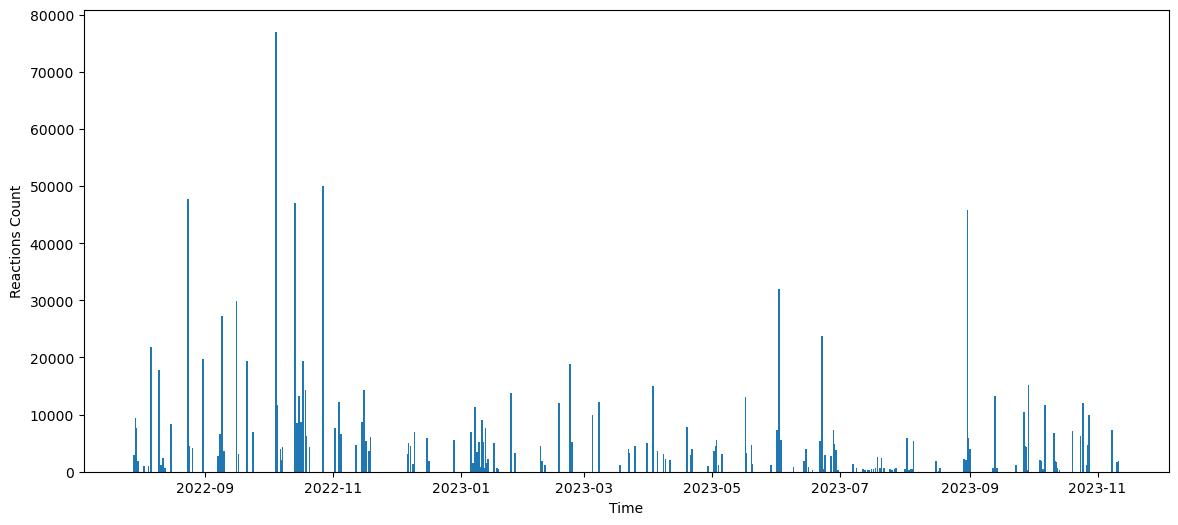

In [15]:
data['time'] = pd.to_datetime(data['time'])

plt.figure(figsize=(14, 6))

plt.bar(data['time'], data['reaction_count'])
plt.xlabel('Time')
plt.ylabel('Reactions Count')

plt.show()

In [16]:
data_sorted_by_reaction = data[['time', 'reaction_count']].sort_values(by='reaction_count', ascending=False)

data_sorted_by_reaction

,time,reaction_count
254,2022-10-05 00:49:56,77022
232,2022-10-27 07:00:01,49999
281,2022-08-23 22:00:31,47762
244,2022-10-13 20:56:23,47100
48,2023-08-30 22:30:25,45771
...,...,...
69,2023-07-31 23:04:43,257
73,2023-07-26 01:03:59,251
27,2023-09-28 22:06:23,236
87,2023-07-14 23:10:13,147


C:\Users\admin\AppData\Local\Temp\ipykernel_19824\98208985.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['reaction_count'], ax=ax)


Text(0.5, 0, 'Reaction Count')

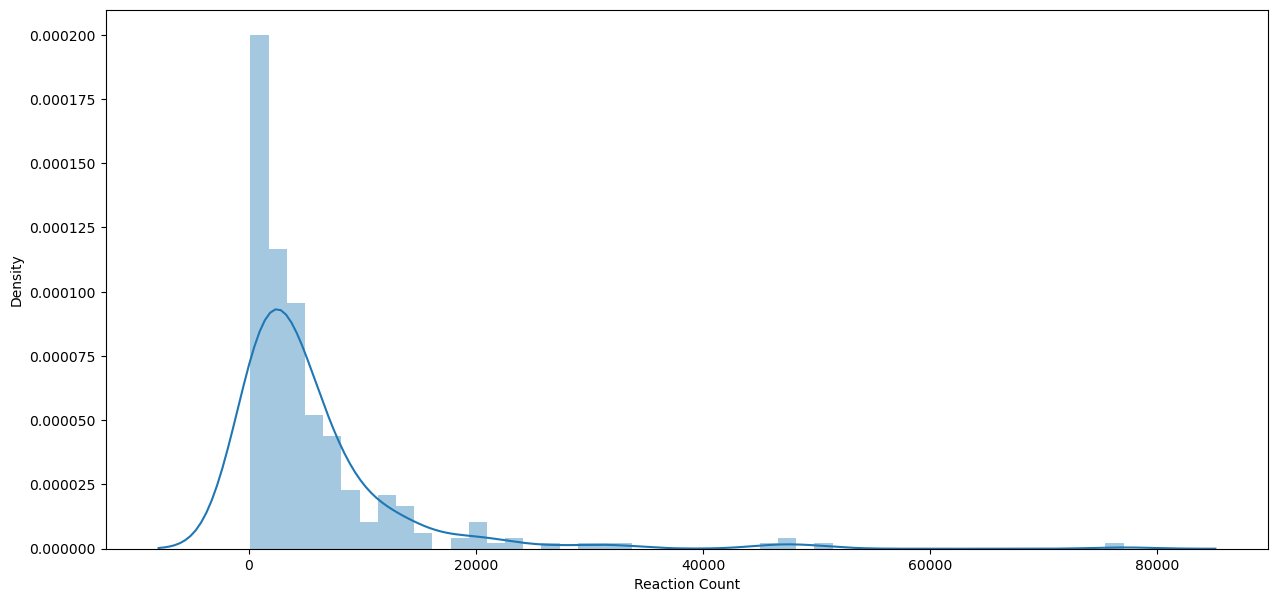

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(data['reaction_count'], ax=ax)

ax.set_xlabel('Reaction Count')

# Sự tương quan giữa số lượt reactions, shares, comments

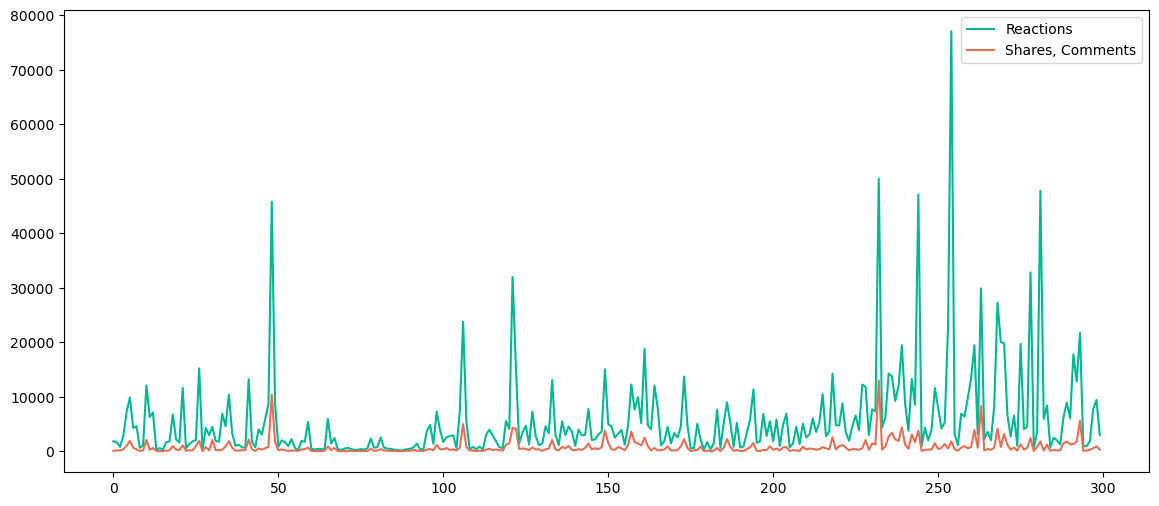

In [18]:
Y = data['reaction_count']
Y2 = data['comments'] + data['shares']

plt.figure(figsize=(14, 6))

plt.plot(np.arange(len(Y)), Y, color='#00b894', label='Reactions')
plt.plot(np.arange(len(Y2)), Y2, color='#e17055', label='Shares, Comments')

plt.legend()
plt.show()

# Đánh giá cảm nhận của người chơi

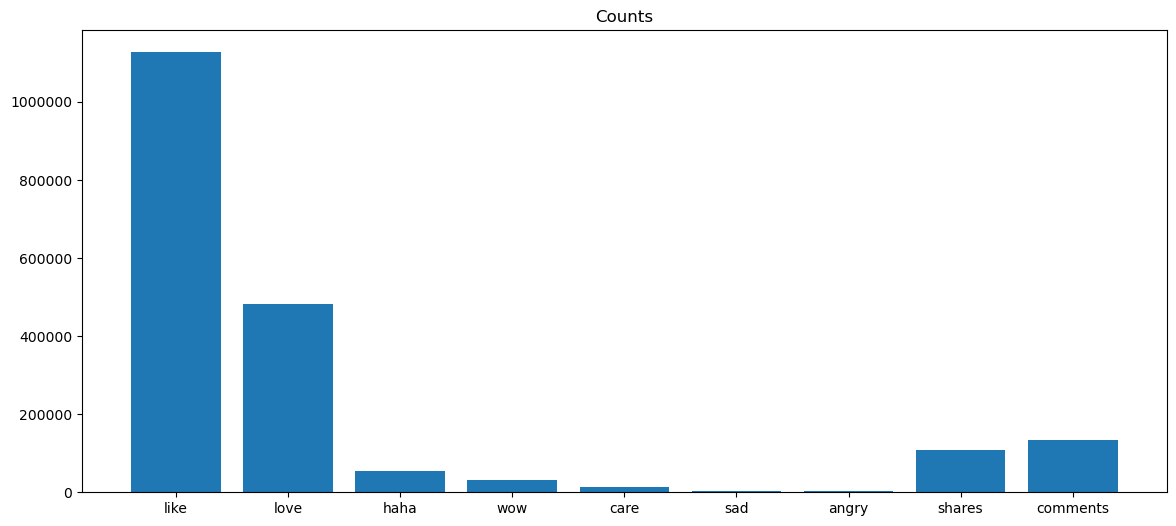

In [19]:
total_reactions = data[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry', 'shares', 'comments']].sum()
plt.figure(figsize=(14, 6))

plt.bar(total_reactions.index, total_reactions.values)
plt.title('Counts')

plt.ticklabel_format(style='plain', axis='y')
plt.show()

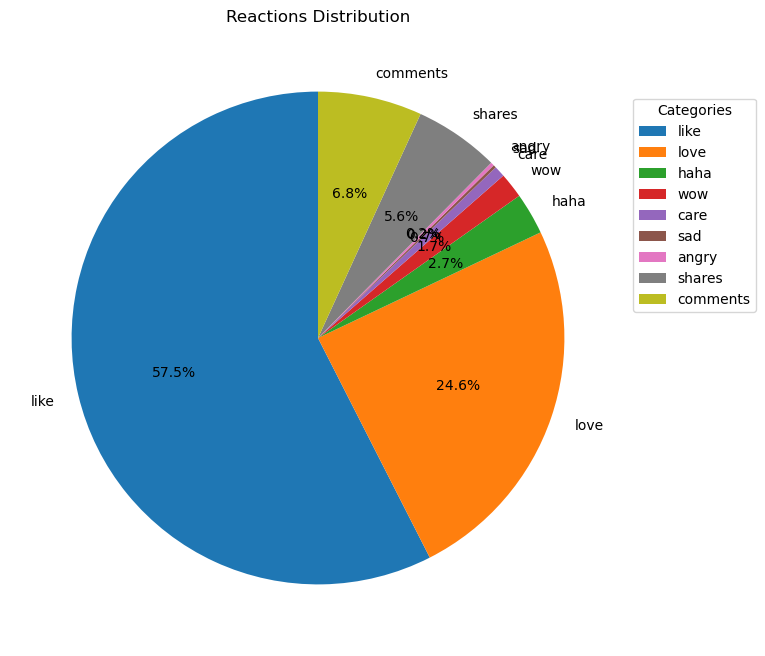

In [20]:
plt.figure(figsize=(8, 8))

plt.pie(total_reactions.values, labels=total_reactions.index, autopct='%1.1f%%', startangle=90)
plt.title('Reactions Distribution')

plt.legend(title="Categories", bbox_to_anchor=(1, 0.9))
plt.show()

# Quốc gia có số lượng người chơi nhiều nhất

In [21]:
data['comments_full'].iloc[0]

'[{\'comment_id\': \'3290891204536437\', \'comment_url\': \'https://facebook.com/3290891204536437\', \'commenter_id\': \'1191240047\', \'commenter_url\': \'https://facebook.com/josh.mitchell.50?eav=AfYzFh62EdWC-yfHL8PW5n1PVOxGSfyb-zlur5Qhes6uk0wzDtC89vsqnfTzRdLDYDg&fref=nf&rc=p&refid=13&__tn__=R&paipv=0\', \'commenter_name\': \'Josh Mitchell\', \'commenter_meta\': None, \'comment_text\': \'Every time I play your game, I get this constant feeling that any time an employee comes up with a concept of balance... you immediately fire them...\', \'comment_time\': datetime.datetime(2023, 11, 13, 20, 0), \'comment_image\': \'https://scontent.fhan3-1.fna.fbcdn.net/m1/v/t6/An_UvxJXg9tdnLU3Y5qjPi0200MLilhzPXUgxzGjQzUMaNcmjdZA6anyrngvkdub33NZzZhd51fpCAEzNHFhko5aKRFP5fS1w_lKwYrzcNLupv27.png?ccb=10-5&oh=00_AfDSa4XQVsUlKBybUPzhwguAABKpNUIvcFIUqz7z7AS7gg&oe=657A4879&_nc_sid=7da55a\', \'comment_reactors\': [{\'name\': \'Nai-61\', \'link\': \'https://facebook.com/profile.php?id=61550479547537&eav=AfZXAh

# Test


In [22]:
import json

